In [13]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf as maf
import healpy as hp

In [2]:
filename = 'draft_v2.99_10yrs.db'
run_name = filename.replace('.db', '')

In [7]:
class TimeScaleN(maf.metrics.BaseMetric):
    """how many observations spanning some timescale
    """
    def __init__(self, night_col='night', metric_name='TimeScaleN', 
                 gap=1, **kwargs):
        self.night_col=night_col
        self.gap = gap
        super(TimeScaleN, self).__init__(col=night_col, metric_name=metric_name, **kwargs)
    def run(self, dataSlice, slice_point=None):
        
        # night is handy. if we want to do some arbitrary timescale probably have to 
        # got and make the full difference array. 
        
        # Could loop through each filter if we want to demand same-filter
        unights = np.unique(dataSlice[self.night_col])
        nd = np.diff(unights)
        result = np.size(np.where(nd == self.gap)[0])
        return result

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metrics/base_metric.py:37: UserWarning: Redefining metric __main__.TimeScaleN! (there are >1 metrics with the same name)
  warnings.warn(


In [8]:
bundle_list = []
sql = 'visitExposureTime > 20'
metric = TimeScaleN()
slicer = maf.HealpixSlicer()

bundle_list.append(maf.MetricBundle(metric, slicer, sql))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [9]:
bd = maf.make_bundles_dict_from_list(bundle_list)
mbg = maf.MetricBundleGroup(bd, filename, out_dir='temp')

In [10]:
mbg.run_all()

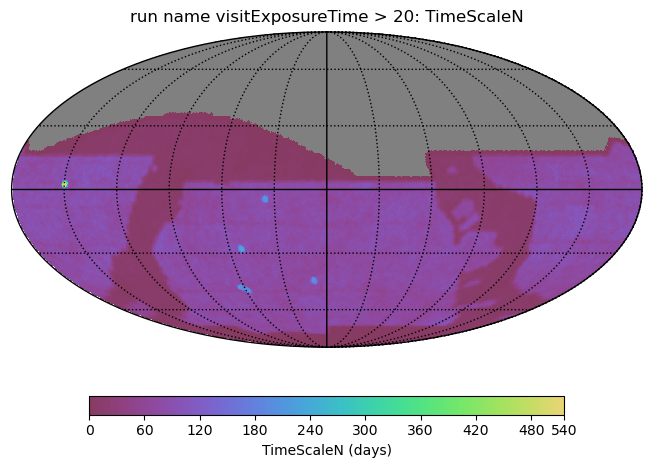

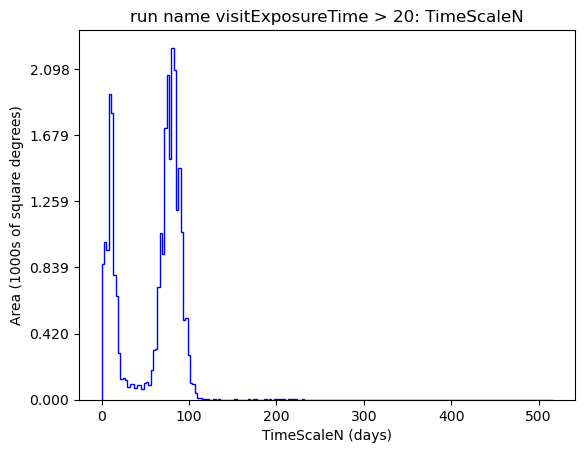

In [12]:
mbg.plot_all(closefigs=False)

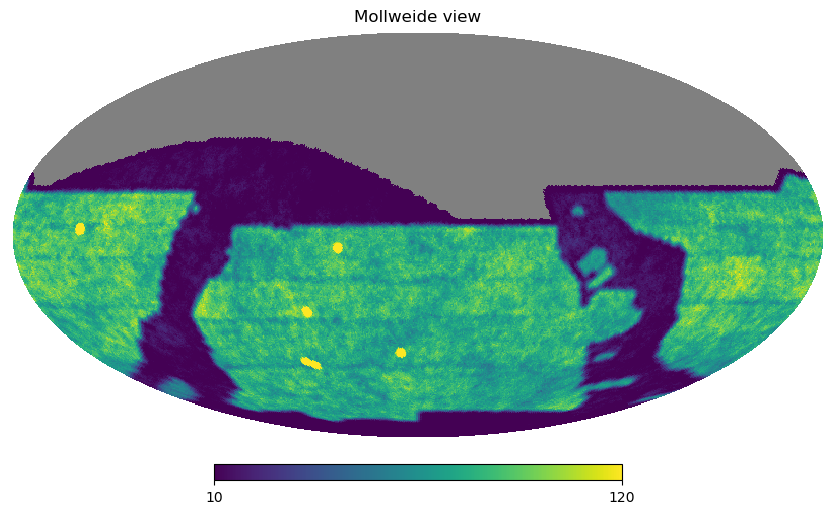

In [17]:
hp.mollview(bundle_list[0].metric_values, max=120, min=10)